In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [6]:
customers=pd.read_csv('Ecommerce Customers.csv')

In [7]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [8]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 25.4+ KB


In [9]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


c:\users\admin\appdata\local\programs\python\python36-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


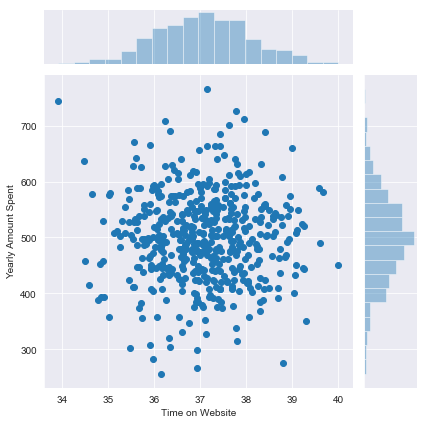

In [11]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

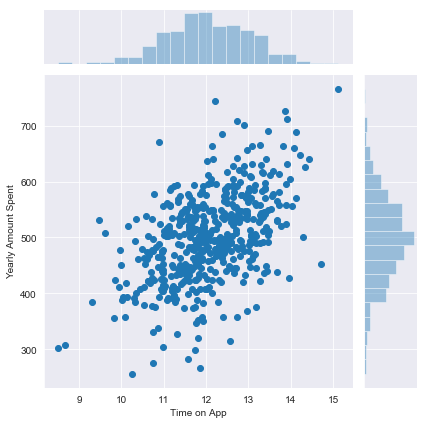

In [12]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

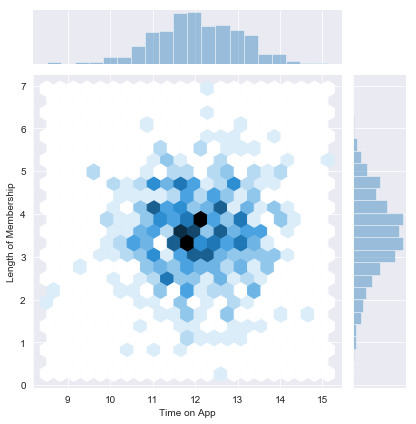

In [13]:
sns.jointplot(x='Time on App',y='Length of Membership',data=customers,
             kind='hex')

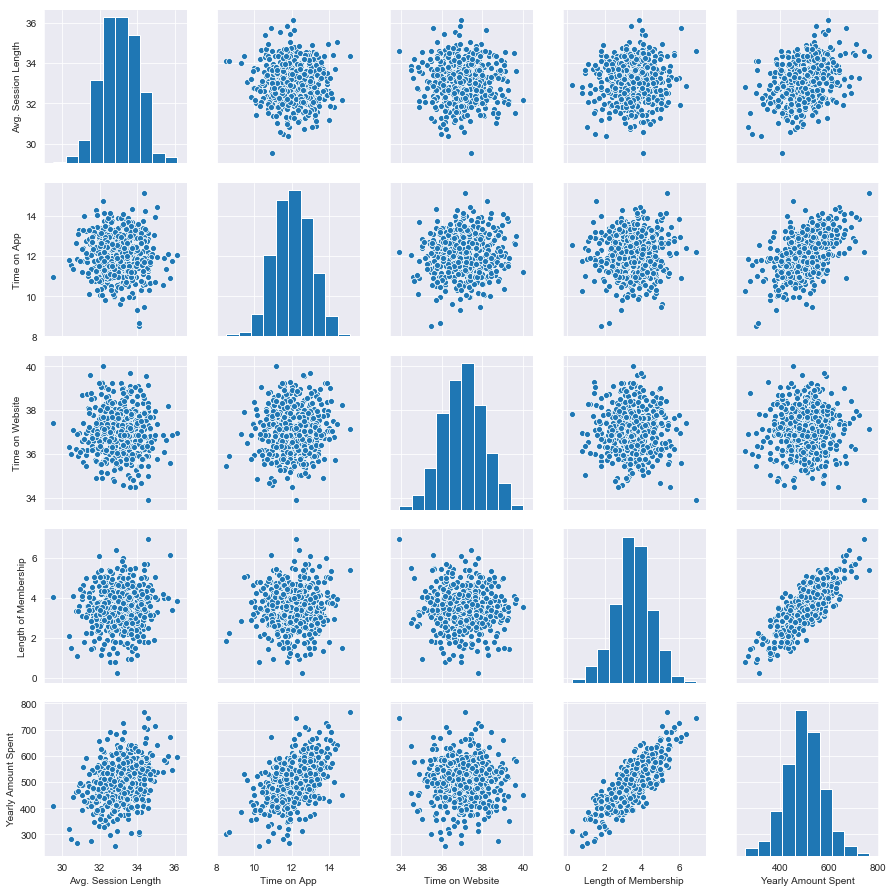

In [14]:
sns.pairplot(customers)

c:\users\admin\appdata\local\programs\python\python36-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


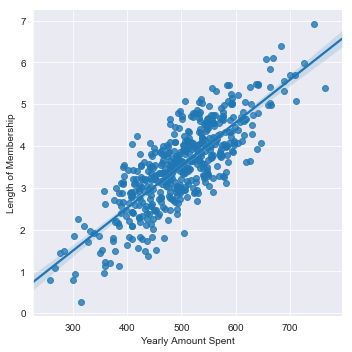

In [15]:
sns.lmplot(x='Yearly Amount Spent',y='Length of Membership',data=customers)

In [17]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [19]:
X=customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [21]:
y=customers['Yearly Amount Spent']

In [23]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=101)

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
lm=LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
print(lm.intercept_)

9.094947017729282e-13


In [60]:
lm.coef_

array([-1.61104378e-15, -5.78426196e-14,  2.74303150e-17, -1.88855008e-14,
        1.00000000e+00])

In [61]:
X.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [62]:
X_train.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [63]:
cdf=pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])

In [64]:
cdf

,Coeff
Avg. Session Length,-1.611044e-15
Time on App,-5.784262e-14
Time on Website,2.743031e-17
Length of Membership,-1.888550e-14
Yearly Amount Spent,1.000000e+00


In [65]:
predictions=lm.predict(X_test)

Text(0,0.5,'predicted values')

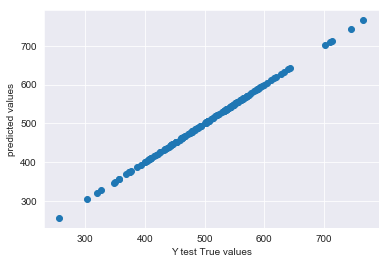

In [72]:
plt.scatter(y_test,predictions)
plt.xlabel('Y test True values')
plt.ylabel('predicted values')

c:\users\admin\appdata\local\programs\python\python36-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


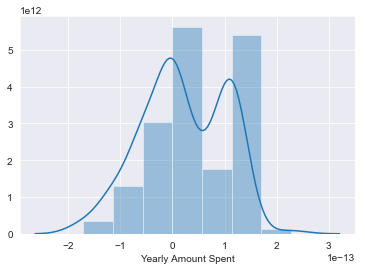

In [67]:
sns.distplot((y_test-predictions))

In [68]:
from sklearn import metrics

In [69]:
metrics.mean_absolute_error(y_test, predictions)

6.366462912410498e-14

In [70]:
metrics.mean_squared_error(y_test, predictions)

6.72084247699335e-27

In [71]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

8.198074455012806e-14

In [73]:
print('MAE',metrics.mean_absolute_error(y_test, predictions))
print('MSE',metrics.mean_squared_error(y_test, predictions))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE 6.366462912410498e-14
MSE 6.72084247699335e-27
RMSE 8.198074455012806e-14


In [74]:
metrics.explained_variance_score(y_test, predictions)

1.0